# Statistical tests of differences in group means of results

In [4]:
library(MASS)

## Load evaluation data

In [5]:
results_dir <- '../flatlander/entrypoints/results/'

In [94]:
small.spa <- read.csv(paste(results_dir, "SPA-small_1000-episodes.csv", sep = ""), header = TRUE)
small.spa_cpr <- read.csv(paste(results_dir, "SPA-CPR-small_1000-episodes.csv", sep = ""), header = TRUE)
small.spa_tcpr <- read.csv(paste(results_dir, "SPA-TCPR-small_1000-episodes.csv", sep = ""), header = TRUE)
small.ato <- read.csv(paste(results_dir, "ATO-small_1000-episodes.csv", sep = ""), header = TRUE)
small.rlpr_tcpr <- read.csv(paste(results_dir, "RLPR-TCPR-small_1000-episodes.csv", sep = ""), header = TRUE)
small.rlps_tcpr <- read.csv(paste(results_dir, "RLPS-TCPR-small_1000-episodes.csv", sep = ""), header = TRUE)

m.spa <- read.csv(paste(results_dir, "SPA-medium_1000-episodes.csv", sep = ""), header = TRUE)
m.spa_cpr <- read.csv(paste(results_dir, "SPA-CPR-medium_1000-episodes.csv", sep = ""), header = TRUE)
m.spa_tcpr <- read.csv(paste(results_dir, "SPA-TCPR-medium_1000-episodes.csv", sep = ""), header = TRUE)
m.ato <- read.csv(paste(results_dir, "ATO-medium_1000-episodes.csv", sep = ""), header = TRUE)
m.rlpr_tcpr <- read.csv(paste(results_dir, "RLPR-TCPR-medium_1000-episodes.csv", sep = ""), header = TRUE)

l.spa <- read.csv(paste(results_dir, "SPA-large_200-episodes.csv", sep = ""), header = TRUE)
l.spa_cpr <- read.csv(paste(results_dir, "SPA-CPR-large_200-episodes.csv", sep = ""), header = TRUE)
l.spa_tcpr <- read.csv(paste(results_dir, "SPA-TCPR-large_200-episodes.csv", sep = ""), header = TRUE)
l.ato <- read.csv(paste(results_dir, "ATO-large_200-episodes.csv", sep = ""), header = TRUE)
l.rlpr_tcpr <- read.csv(paste(results_dir, "RLPR-TCPR-large_200-episodes.csv", sep = ""), header = TRUE)

## Investigate sample distributions

In [57]:
pdf(file = "./qqplot_cpr.pdf", 
    width = 4,
    height = 4)

qqnorm(small.spa_cpr$returns, pch = 1, frame = FALSE)
qqline(small.spa_cpr$returns, col = "steelblue", lwd = 2)
dev.off()

png 
  2

In [58]:
pdf(file = "./qqplot_tcpr.pdf", 
    width = 4,
    height = 4)

qqnorm(small.spa_tcpr$returns, pch = 1, frame = FALSE)
qqline(small.spa_tcpr$returns, col = "steelblue", lwd = 2)
dev.off()

png 
  2

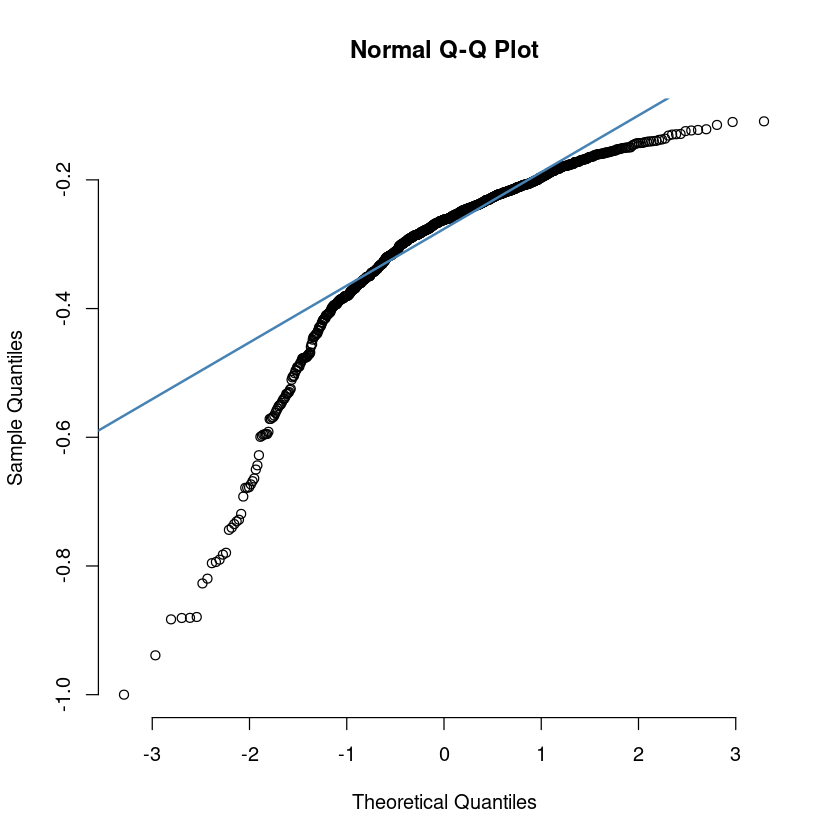

In [59]:
qqnorm(m.spa_tcpr$returns, pch = 1, frame = FALSE)
qqline(m.spa_tcpr$returns, col = "steelblue", lwd = 2)

In [95]:
small.pc_data = data.frame(cbind(spa=small.spa$pc, 
                                 spa_cpr=small.spa_cpr$pc, 
                                 spa_tcpr=small.spa_tcpr$pc, 
                                 ato=small.ato$pc, 
                                 rlpr_tcpr=small.rlpr_tcpr$pc,
                                 rlps_tcpr=small.rlps_tcpr$pc))

small.returns_data = data.frame(cbind(spa=small.spa$returns, 
                                      spa_cpr=small.spa_cpr$returns, 
                                      spa_tcpr=small.spa_tcpr$returns, 
                                      ato=small.ato$returns, 
                                      rlpr_tcpr=small.rlpr_tcpr$returns,
                                      rlps_tcpr=small.rlps_tcpr$returns))

In [96]:
m.pc_data = data.frame(cbind(spa=m.spa$pc,
                             spa_cpr=m.spa_cpr$pc, 
                             spa_tcpr=m.spa_tcpr$pc, 
                             ato=m.ato$pc, 
                             rlpr_tcpr=m.rlpr_tcpr$pc))

m.returns_data = data.frame(cbind(spa=m.spa$returns,
                                  spa_cpr=m.spa_cpr$returns, 
                                  spa_tcpr=m.spa_tcpr$returns, 
                                  ato=m.ato$returns, 
                                  rlpr_tcpr=m.rlpr_tcpr$returns))

In [97]:
l.pc_data = data.frame(cbind(spa=l.spa$pc,
                            spa_cpr=l.spa_cpr$pc, 
                            spa_tcpr=l.spa_tcpr$pc, 
                            ato=l.ato$pc,
                            rlpr_tcpr=l.rlpr_tcpr$pc))

l.returns_data = data.frame(cbind(spa=l.spa$returns,
                                  spa_cpr=l.spa_cpr$returns, 
                                  spa_tcpr=l.spa_tcpr$returns, 
                                  ato=l.ato$returns,
                                  rlpr_tcpr=l.rlpr_tcpr$returns))

In [98]:
small.stacked_pc_data <- stack(small.pc_data)
small.stacked_returns_data <- stack(small.returns_data)

m.stacked_pc_data <- stack(m.pc_data)
m.stacked_returns_data <- stack(m.returns_data)

l.stacked_pc_data <- stack(l.pc_data)
l.stacked_returns_data <- stack(l.returns_data)

## Perform tests to asses significant differences in group means

In [99]:
pairwise.wilcox.test(small.stacked_pc_data$values, small.stacked_pc_data$ind, p.adjust.method = "BH")
pairwise.wilcox.test(small.stacked_returns_data$values, small.stacked_returns_data$ind, p.adjust.method = "BH")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  small.stacked_pc_data$values and small.stacked_pc_data$ind 

          spa     spa_cpr spa_tcpr ato     rlpr_tcpr
spa_cpr   < 2e-16 -       -        -       -        
spa_tcpr  < 2e-16 < 2e-16 -        -       -        
ato       < 2e-16 < 2e-16 < 2e-16  -       -        
rlpr_tcpr < 2e-16 0.316   1.4e-14  < 2e-16 -        
rlps_tcpr < 2e-16 < 2e-16 0.068    < 2e-16 < 2e-16  

P value adjustment method: BH 


	Pairwise comparisons using Wilcoxon rank sum test 

data:  small.stacked_returns_data$values and small.stacked_returns_data$ind 

          spa    spa_cpr spa_tcpr ato    rlpr_tcpr
spa_cpr   <2e-16 -       -        -      -        
spa_tcpr  <2e-16 <2e-16  -        -      -        
ato       <2e-16 <2e-16  <2e-16   -      -        
rlpr_tcpr <2e-16 0.95    <2e-16   <2e-16 -        
rlps_tcpr <2e-16 <2e-16  0.80     <2e-16 <2e-16   

P value adjustment method: BH 

In [100]:
pairwise.wilcox.test(m.stacked_returns_data$values, m.stacked_returns_data$ind, p.adjust.method = "BH")
pairwise.wilcox.test(m.stacked_pc_data$values, m.stacked_pc_data$ind, p.adjust.method = "BH")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  m.stacked_returns_data$values and m.stacked_returns_data$ind 

          spa     spa_cpr spa_tcpr ato    
spa_cpr   < 2e-16 -       -        -      
spa_tcpr  < 2e-16 0.32873 -        -      
ato       0.00025 < 2e-16 < 2e-16  -      
rlpr_tcpr < 2e-16 5.8e-07 1.3e-05  < 2e-16

P value adjustment method: BH 


	Pairwise comparisons using Wilcoxon rank sum test 

data:  m.stacked_pc_data$values and m.stacked_pc_data$ind 

          spa     spa_cpr spa_tcpr ato    
spa_cpr   < 2e-16 -       -        -      
spa_tcpr  < 2e-16 0.782   -        -      
ato       4.6e-07 < 2e-16 < 2e-16  -      
rlpr_tcpr < 2e-16 0.038   0.100    < 2e-16

P value adjustment method: BH 

In [108]:
pairwise.wilcox.test(l.stacked_returns_data$values, l.stacked_returns_data$ind, p.adjust.method = "BH")
pairwise.wilcox.test(l.stacked_pc_data$values, l.stacked_pc_data$ind, p.adjust.method = "BH")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  l.stacked_returns_data$values and l.stacked_returns_data$ind 

          spa    spa_cpr spa_tcpr ato   
spa_cpr   <2e-16 -       -        -     
spa_tcpr  <2e-16 0.2203  -        -     
ato       0.5722 <2e-16  <2e-16   -     
rlpr_tcpr <2e-16 0.4290  0.0087   <2e-16

P value adjustment method: BH 


	Pairwise comparisons using Wilcoxon rank sum test 

data:  l.stacked_pc_data$values and l.stacked_pc_data$ind 

          spa    spa_cpr spa_tcpr ato   
spa_cpr   <2e-16 -       -        -     
spa_tcpr  <2e-16 0.016   -        -     
ato       0.610  <2e-16  <2e-16   -     
rlpr_tcpr <2e-16 0.436   0.046    <2e-16

P value adjustment method: BH 

## Group means for percentage complete

In [109]:
mean(small.spa$pc)
mean(small.spa_cpr$pc)
mean(small.spa_tcpr$pc)
mean(small.ato$pc)
mean(small.rlpr_tcpr$pc)
mean(small.rlps_tcpr$pc)

[1] 0.305375

[1] 0.9231875

[1] 0.9615

[1] 0.438

[1] 0.944875

[1] 0.9720625

In [110]:
mean(m.spa_cpr$pc)
mean(m.spa_tcpr$pc)
mean(m.ato$pc)
mean(m.rlpr_tcpr$pc)

[1] 0.9374687

[1] 0.935375

[1] 0.1965

[1] 0.949875

In [111]:
mean(l.spa$pc)
mean(l.spa_cpr$pc)
mean(l.spa_tcpr$pc)
mean(l.ato$pc)
mean(l.rlpr_tcpr$pc)

[1] 0.07742188

[1] 0.6999219

[1] 0.7667188

[1] 0.08625

[1] 0.7532031

## Group means for normalized returns

In [105]:
mean(small.spa$returns)
mean(small.spa_cpr$returns)
mean(small.spa_tcpr$returns)
mean(small.ato$returns)
mean(small.rlpr_tcpr$returns)
mean(small.rlps_tcpr$returns)

[1] -0.7160007

[1] -0.2154113

[1] -0.1692334

[1] -0.6041971

[1] -0.1987511

[1] -0.1625355

In [106]:
mean(m.spa_cpr$returns)
mean(m.spa_tcpr$returns)
mean(m.ato$returns)
mean(m.rlpr_tcpr$returns)

[1] -0.2941194

[1] -0.2924709

[1] -0.8236772

[1] -0.301215

In [107]:
mean(l.spa$returns)
mean(l.spa_cpr$returns)
mean(l.spa_tcpr$returns)
mean(l.ato$returns)
mean(l.rlpr_tcpr$returns)

[1] -0.9258755

[1] -0.50651

[1] -0.5197076

[1] -0.9218278

[1] -0.4792151